# Cridit card fraud detection
---

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

In [249]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [250]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [251]:
df.columns = [x.lower() for x in df.columns]

In [252]:
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

In [253]:
df.duplicated().sum()

1081

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  float64
 21  v21     28

In [255]:
df['class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: class, dtype: float64

<AxesSubplot: xlabel='class', ylabel='count'>

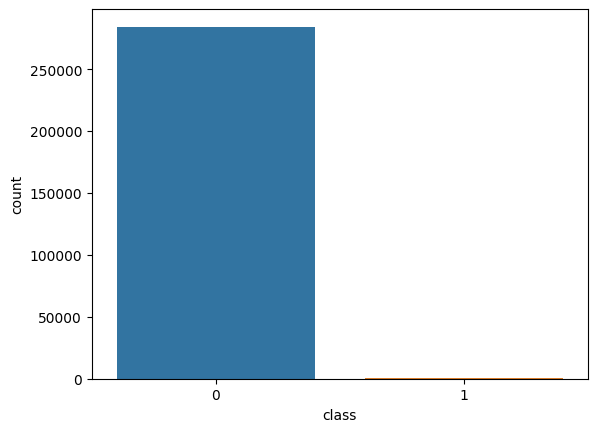

In [256]:
sns.countplot(x=df['class'])

In [257]:
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

In [258]:
x = df.drop(['time','class'], axis=1)
y = df['class']

In [259]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 2022)
# y의 데이터 값이 너무 한쪽으로 기울어져있으면 stratify를 사용하여 골고루 분포시킨다.

In [260]:
x_train.shape, x_test.shape

((227845, 29), (56962, 29))

In [261]:
x_train

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
180622,1.979681,-0.474765,-0.590701,0.177380,-0.240664,0.431618,-0.764432,0.208290,1.222522,-0.005470,...,-0.157936,0.205647,0.781997,0.075669,0.220107,-0.034573,-0.233996,0.032740,-0.044631,9.99
55978,0.964175,-1.052088,-0.017591,-0.492805,-1.165913,-1.021734,0.003150,-0.192763,-1.259083,0.778697,...,-0.133142,-0.630779,-1.947002,0.138484,0.481624,-0.177094,0.576203,-0.123411,0.033147,209.00
262061,-0.867775,0.546923,0.245089,-0.903494,2.815045,4.141723,0.438113,1.061168,-0.596154,-0.837835,...,0.100236,0.081071,0.033550,-0.292623,0.670734,0.861808,-0.515053,0.056489,0.061340,65.00
191188,0.786440,0.627927,0.189040,0.972690,0.604452,-0.588146,1.478182,-1.433454,0.350121,1.595765,...,0.418000,0.265309,1.655252,-0.402629,0.216880,-0.306025,1.210782,-1.207652,-0.967302,24.84
268272,1.933397,-0.260520,-0.473325,1.512736,-0.322205,-0.080908,-0.312499,0.071308,1.361587,0.009141,...,-0.334131,-0.551011,-1.349955,0.398574,-0.531820,-0.319016,-1.074591,0.048692,-0.035306,17.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80530,-0.881069,-0.781485,0.080529,-3.451610,0.872340,3.484037,-1.288272,1.374577,-2.441680,0.489493,...,-0.108762,0.127439,0.243141,-0.051868,0.986093,0.221627,-0.184973,-0.021020,0.010340,79.00
247532,-1.191586,0.254653,1.198377,-2.408086,-0.953886,0.921060,-1.187719,1.059878,0.423681,0.291503,...,0.226456,0.137332,0.592430,-0.157397,0.078194,-0.108729,-0.287664,0.498682,0.264822,2.00
135761,-1.148252,0.511381,0.891353,-0.434903,0.578820,-0.184769,0.408490,-1.138738,0.805643,0.124250,...,-0.401465,0.373786,-0.689279,0.451708,-0.442165,-1.070208,-0.127763,0.027261,0.088082,19.99
273792,1.940035,-0.646947,-0.304405,0.281822,-1.024825,-0.710335,-0.678226,-0.014725,1.698491,-0.186593,...,-0.231831,0.182409,0.665687,0.128453,0.058553,-0.221864,0.123801,0.003305,-0.039673,34.95


In [262]:
y_train.shape

(227845,)

In [263]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

In [264]:
# y_train = scaler.fit_transform(pd.DataFrame(y_train))

In [265]:
# y_test = scaler.fit_transform(pd.DataFrame(y_test))

In [266]:
# RobustSclaer은 값을 구할때 평균과 표준편차를 이용하는 것이 아닌, median을 이용하여 계산한다.

In [267]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_train['amount'] = scaler.fit_transform(pd.DataFrame(x_train['amount']))
# x_train['amount'] = scaler.fit_transform(x_train['amount'].values.reshape(1,-1))

In [268]:
x_train

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
180622,1.979681,-0.474765,-0.590701,0.177380,-0.240664,0.431618,-0.764432,0.208290,1.222522,-0.005470,...,-0.157936,0.205647,0.781997,0.075669,0.220107,-0.034573,-0.233996,0.032740,-0.044631,-0.167903
55978,0.964175,-1.052088,-0.017591,-0.492805,-1.165913,-1.021734,0.003150,-0.192763,-1.259083,0.778697,...,-0.133142,-0.630779,-1.947002,0.138484,0.481624,-0.177094,0.576203,-0.123411,0.033147,2.616622
262061,-0.867775,0.546923,0.245089,-0.903494,2.815045,4.141723,0.438113,1.061168,-0.596154,-0.837835,...,0.100236,0.081071,0.033550,-0.292623,0.670734,0.861808,-0.515053,0.056489,0.061340,0.601791
191188,0.786440,0.627927,0.189040,0.972690,0.604452,-0.588146,1.478182,-1.433454,0.350121,1.595765,...,0.418000,0.265309,1.655252,-0.402629,0.216880,-0.306025,1.210782,-1.207652,-0.967302,0.039877
268272,1.933397,-0.260520,-0.473325,1.512736,-0.322205,-0.080908,-0.312499,0.071308,1.361587,0.009141,...,-0.334131,-0.551011,-1.349955,0.398574,-0.531820,-0.319016,-1.074591,0.048692,-0.035306,-0.058206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80530,-0.881069,-0.781485,0.080529,-3.451610,0.872340,3.484037,-1.288272,1.374577,-2.441680,0.489493,...,-0.108762,0.127439,0.243141,-0.051868,0.986093,0.221627,-0.184973,-0.021020,0.010340,0.797677
247532,-1.191586,0.254653,1.198377,-2.408086,-0.953886,0.921060,-1.187719,1.059878,0.423681,0.291503,...,0.226456,0.137332,0.592430,-0.157397,0.078194,-0.108729,-0.287664,0.498682,0.264822,-0.279698
135761,-1.148252,0.511381,0.891353,-0.434903,0.578820,-0.184769,0.408490,-1.138738,0.805643,0.124250,...,-0.401465,0.373786,-0.689279,0.451708,-0.442165,-1.070208,-0.127763,0.027261,0.088082,-0.027984
273792,1.940035,-0.646947,-0.304405,0.281822,-1.024825,-0.710335,-0.678226,-0.014725,1.698491,-0.186593,...,-0.231831,0.182409,0.665687,0.128453,0.058553,-0.221864,0.123801,0.003305,-0.039673,0.181335


In [269]:
# !pip install imbalanced-learn

In [270]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=5)
x_train_o, y_train_o = smote.fit_resample(x_train, y_train)

In [271]:
y_train_o.value_counts()

0    227451
1    227451
Name: class, dtype: int64

### 학습 xgboost

In [272]:
# !pip install xgboost --user

In [273]:
%%time

from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators = 300, max_depth=4,
                   learning_rate = 0.1, random_state=2022)
clf.fit(x_train_o, y_train_o)

CPU times: total: 13min 24s
Wall time: 51 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=2022, ...)

In [274]:
clf.score(x_train_o, y_train_o)

0.9993800862603374

In [275]:
### 테스트

In [276]:
x_test['amount'] = scaler.transform(pd.DataFrame(x_test['amount']))

In [277]:
y_pred = clf.predict(x_test)
my.print_score(y_test, y_pred)

accuraccy: 0.9981742214107651
precision: 0.48314606741573035
recall: 0.8775510204081632


In [278]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    cfm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cfm, annot = True, cbar = False, fmt='d') # fmt='d'를 쓰면 정수형으로 나타내어줌
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')
    plt.show()

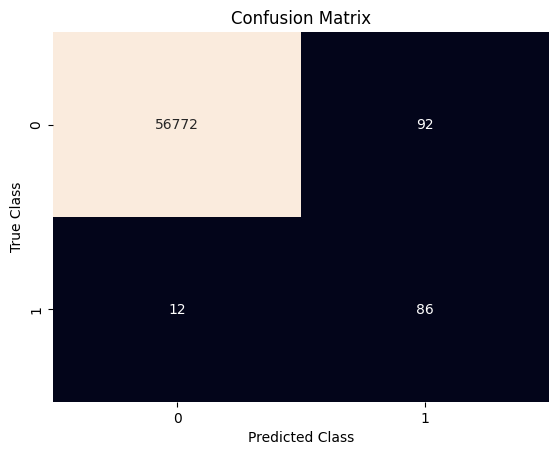

In [279]:
plot_confusion_matrix(y_test, y_pred)

### lightGBM

In [280]:
# !pip install lightgbm --user

In [281]:
%%time

from lightgbm import LGBMClassifier 
# lightGBM이 xgboost보다 나중에 나와서, 속도가 훨씬 빠르다.

clf = LGBMClassifier(n_estimators=300, max_depth=4, learning_rate=0.1, random_state=2022)
clf.fit(x_train_o, y_train_o)

CPU times: total: 45.4 s
Wall time: 3.13 s


LGBMClassifier(max_depth=4, n_estimators=300, random_state=2022)

In [282]:
clf.score(x_train_o, y_train_o)

0.9994504310818594

In [283]:
y_pred = clf.predict(x_test)
my.print_score(y_test, y_pred)

accuraccy: 0.998156665847407
precision: 0.48044692737430167
recall: 0.8775510204081632


In [284]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    cfm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cfm, annot = True, cbar = False, fmt='d') # fmt='d'를 쓰면 정수형으로 나타내어줌
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')
    plt.show()

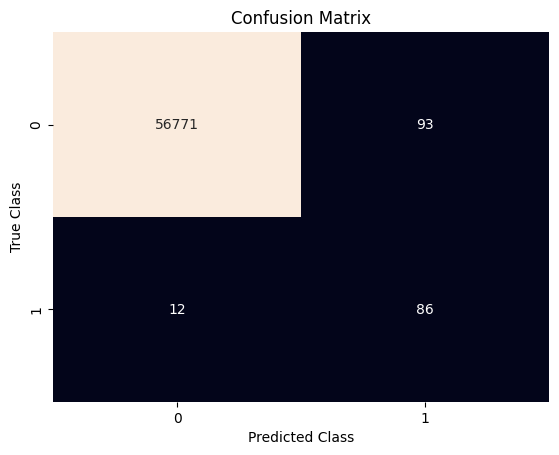

In [285]:
plot_confusion_matrix(y_test, y_pred)

### RandomForest

In [286]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=30, max_depth=4)
clf.fit(x_train_o, y_train_o)

RandomForestClassifier(max_depth=4, n_estimators=30)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': range(10,30),
          'max_depth' : range(14,15),
}

# clf = RandomForestClassifier(random_state = 2022)

gs = GridSearchCV(clf, params, cv=3, verbose=0)
gs.fit(x_train_o, y_train_o)